# Predicate Bitcoin Price With Linear Regression

##  Import Required Library

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

## Simple Review on data

In [65]:
df = pd.read_csv('bitcoin_last_year.csv', encoding='utf8')


In [66]:
df.head()

,Day,Date,Open,High,Low,Close,Volume,Market Cap
0,1,6-Mar-23,"$22,436.82","$22,584.29","$22,331.31","$22,429.76","$17,353,192,895","$433,122,543,176"
1,2,7-Mar-23,"$22,428.32","$22,527.42","$22,011.26","$22,219.77","$22,765,452,204","$429,090,671,120"
2,3,8-Mar-23,"$22,216.44","$22,268.90","$21,708.05","$21,718.08","$22,536,575,684","$419,421,447,158"
3,4,9-Mar-23,"$21,720.08","$21,802.72","$20,210.31","$20,363.02","$30,364,664,171","$393,268,847,888"
4,5,10-Mar-23,"$20,367.00","$20,370.60","$19,628.25","$20,187.24","$39,578,257,695","$389,890,609,884"


## Split Required Data and Review

In [67]:
cdf = df[['Day','Open','High','Low','Close','Volume','Market Cap']]

In [68]:
cdf.head()

,Day,Open,High,Low,Close,Volume,Market Cap
0,1,"$22,436.82","$22,584.29","$22,331.31","$22,429.76","$17,353,192,895","$433,122,543,176"
1,2,"$22,428.32","$22,527.42","$22,011.26","$22,219.77","$22,765,452,204","$429,090,671,120"
2,3,"$22,216.44","$22,268.90","$21,708.05","$21,718.08","$22,536,575,684","$419,421,447,158"
3,4,"$21,720.08","$21,802.72","$20,210.31","$20,363.02","$30,364,664,171","$393,268,847,888"
4,5,"$20,367.00","$20,370.60","$19,628.25","$20,187.24","$39,578,257,695","$389,890,609,884"


In [69]:
cdf.loc[:, 'Open'] = cdf['Open'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf.loc[:, 'High'] = cdf['High'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf.loc[:, 'Low'] = cdf['Low'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf.loc[:, 'Close'] = cdf['Close'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf.loc[:, 'Volume'] = cdf['Volume'].replace({'\\$': '', ',': ''}, regex=True).astype(float)
cdf.loc[:, 'Market Cap'] = cdf['Market Cap'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

In [70]:
cdf

,Day,Open,High,Low,Close,Volume,Market Cap
0,1,22436.82,22584.29,22331.31,22429.76,17353192895.0,433122543176.0
1,2,22428.32,22527.42,22011.26,22219.77,22765452204.0,429090671120.0
2,3,22216.44,22268.9,21708.05,21718.08,22536575684.0,419421447158.0
3,4,21720.08,21802.72,20210.31,20363.02,30364664171.0,393268847888.0
4,5,20367.0,20370.6,19628.25,20187.24,39578257695.0,389890609884.0
...,...,...,...,...,...,...,...
359,360,57071.1,63913.13,56738.42,62504.79,83239156760.0,1227615937615.0
360,361,62499.18,63585.64,60498.73,61198.38,65496611844.0,1202008882584.0
361,362,61168.06,63155.1,60802.53,62440.63,40186368423.0,1226468270481.0
362,363,62431.65,62458.7,61657.29,62029.85,23888473685.0,1218449164617.0


### Working with data and finding the right chart for forecasting

Text(0, 0.5, 'Open')

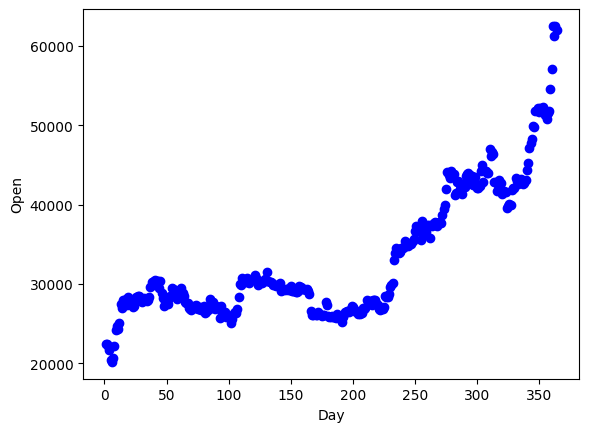

In [71]:

plt.scatter(cdf.Day, cdf.Open,  color='blue')
plt.xlabel("Day")
plt.ylabel("Open")


Text(0, 0.5, 'High')

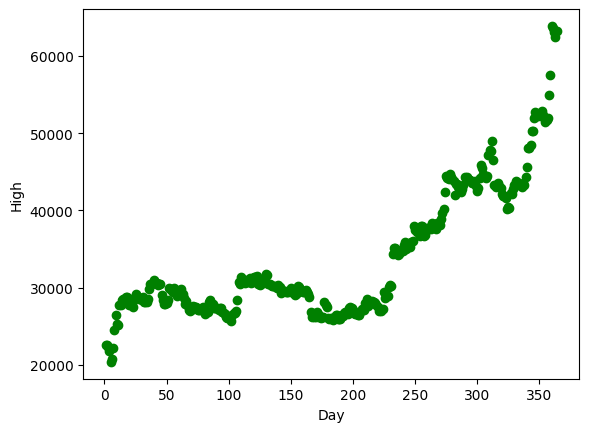

In [72]:
plt.scatter(cdf.Day, cdf.High,  color='green')
plt.xlabel("Day")
plt.ylabel("High")

Text(0, 0.5, 'Low')

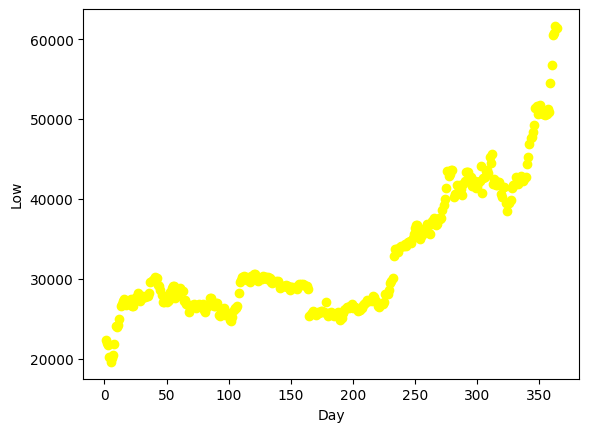

In [73]:
plt.scatter(cdf.Day, cdf.Low,  color='Yellow')
plt.xlabel("Day")
plt.ylabel("Low")

Text(0, 0.5, 'Close')

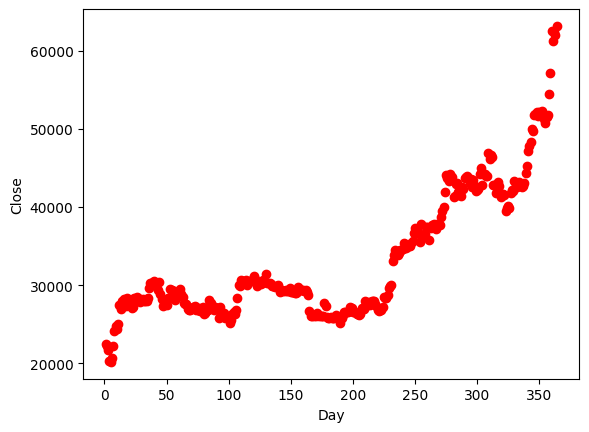

In [74]:
plt.scatter(cdf.Day, cdf.Close,  color='Red')
plt.xlabel("Day")
plt.ylabel("Close")

Text(0, 0.5, 'Volume')

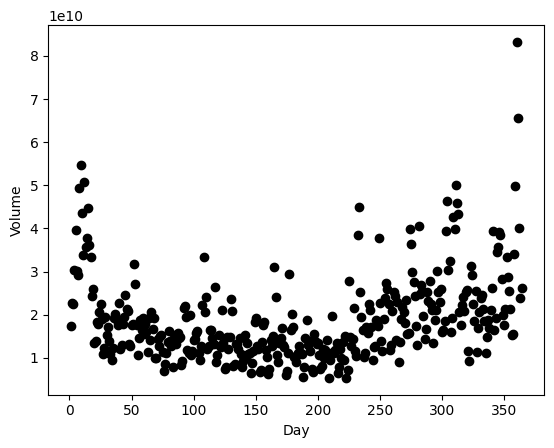

In [75]:
plt.scatter(cdf.Day, cdf.Volume,  color='black')
plt.xlabel("Day")
plt.ylabel("Volume")

Text(0, 0.5, 'Market Cap')

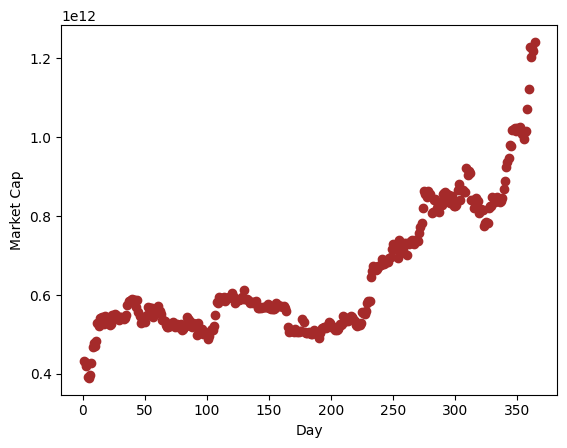

In [76]:
plt.scatter(cdf.Day, cdf["Market Cap"],  color='Brown')
plt.xlabel("Day")
plt.ylabel("Market Cap")

### Graphs are not suitable for finding linear relationships

Text(0, 0.5, 'Volume')

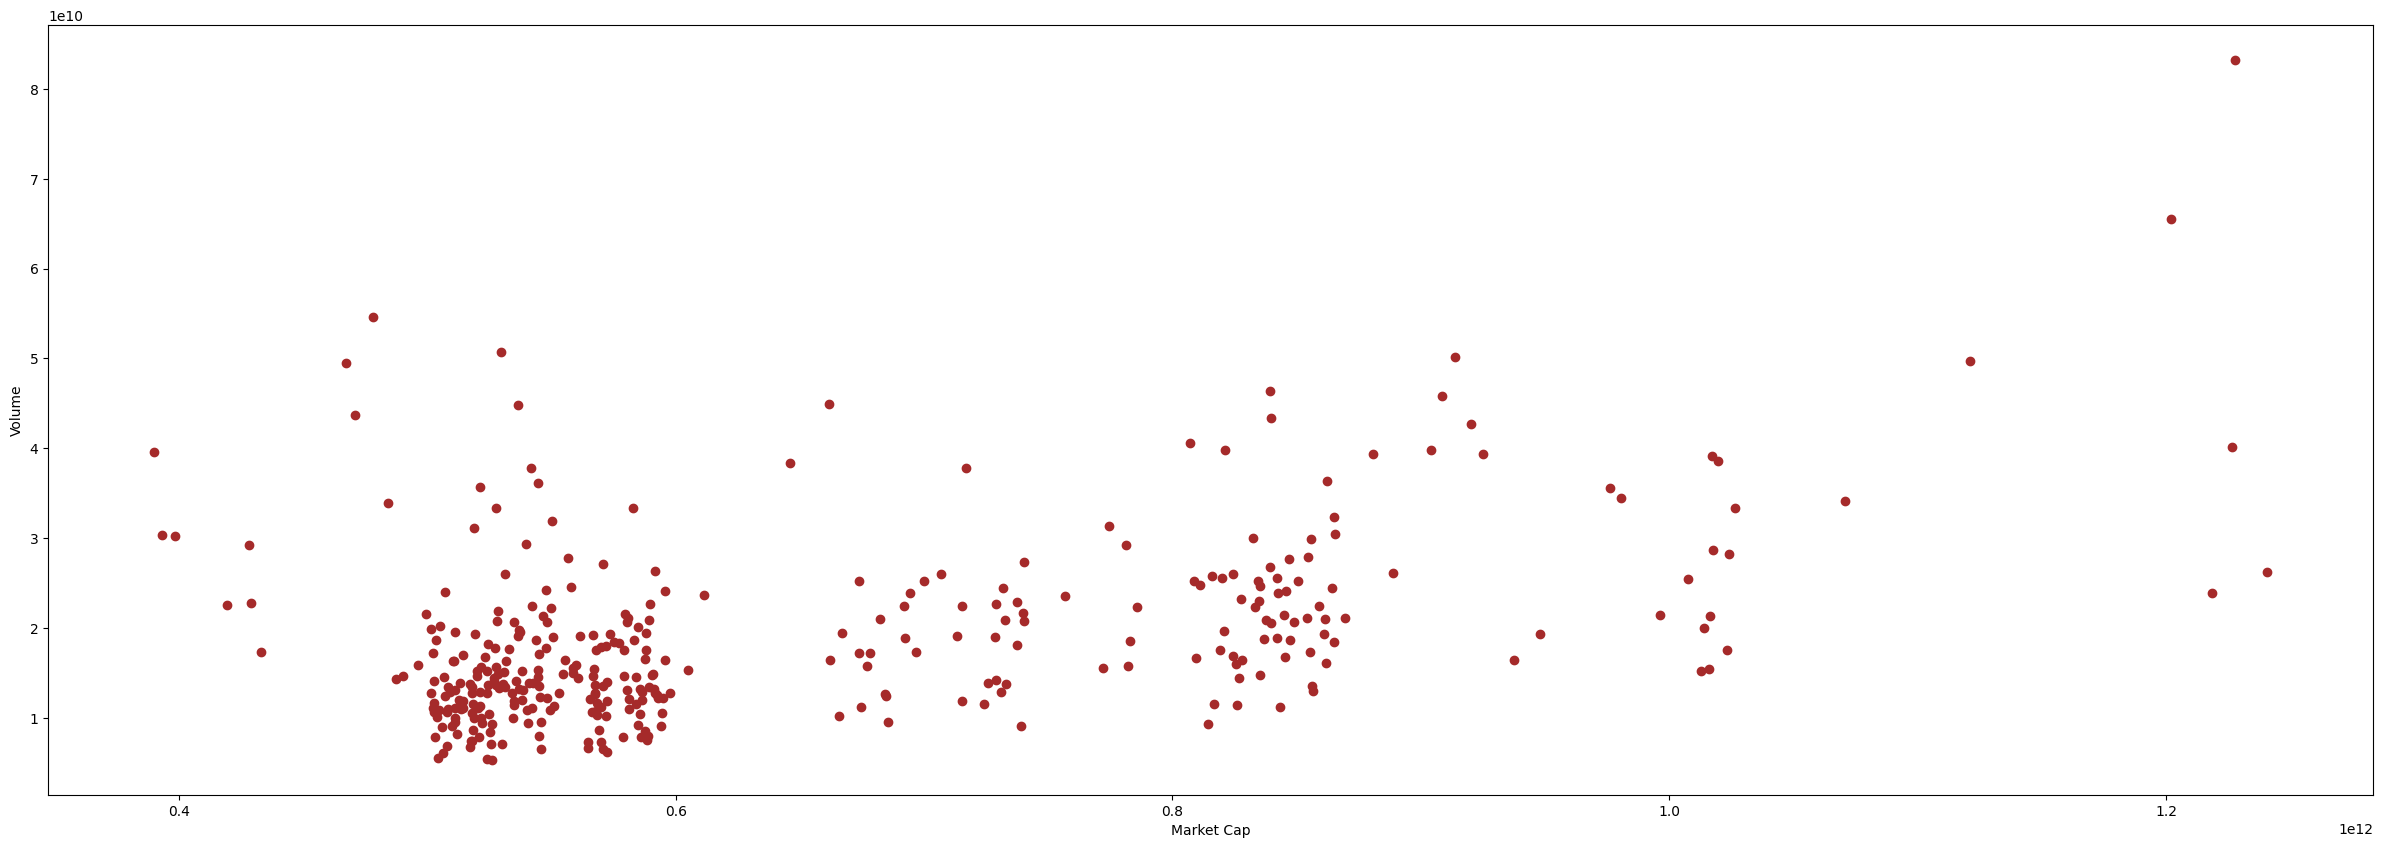

In [77]:
plt.figure(figsize=(30,10))
plt.scatter( cdf["Market Cap"], cdf.Volume, color='Brown')
plt.xlabel("Market Cap")
plt.ylabel("Volume")

## Compare charts

Text(0, 0.5, 'High-Open-Low-Close')

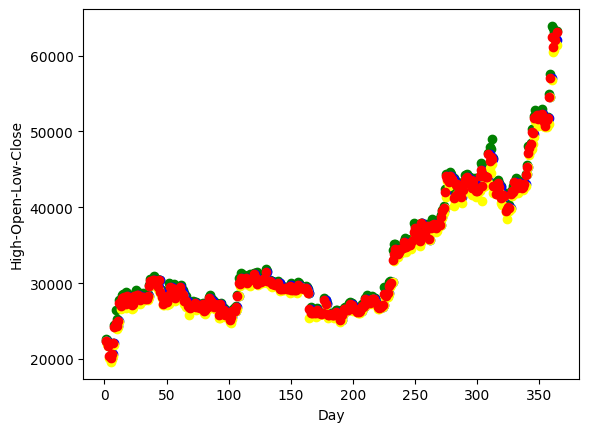

In [78]:
plt.scatter(cdf.Day, cdf.High,  color='green')
plt.scatter(cdf.Day, cdf.Open,  color='blue')
plt.scatter(cdf.Day, cdf.Low,  color='Yellow')
plt.scatter(cdf.Day, cdf.Close,  color='Red')
plt.xlabel("Day")
plt.ylabel("High-Open-Low-Close")


# Find the linear relationship

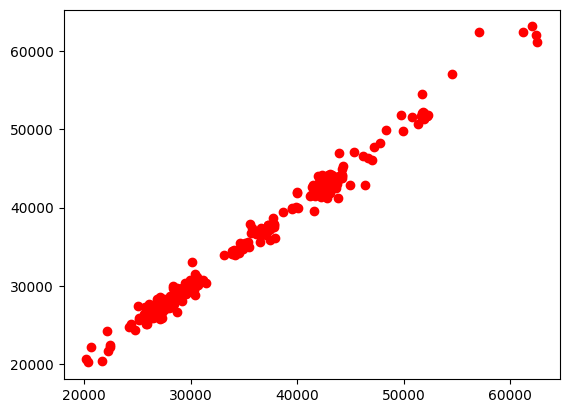

In [79]:

plt.scatter(cdf.Open , cdf.Close ,color = "red")

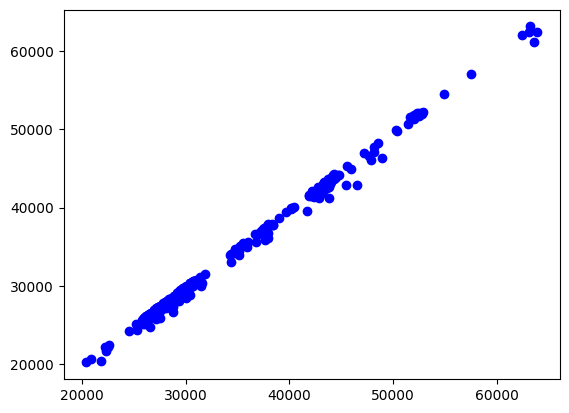

In [80]:
plt.scatter(cdf.High , cdf.Close ,color = "blue")

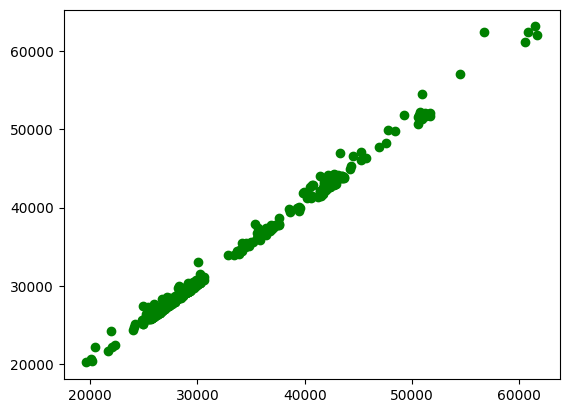

In [81]:
plt.scatter(cdf.Low, cdf.Close ,color = "green")

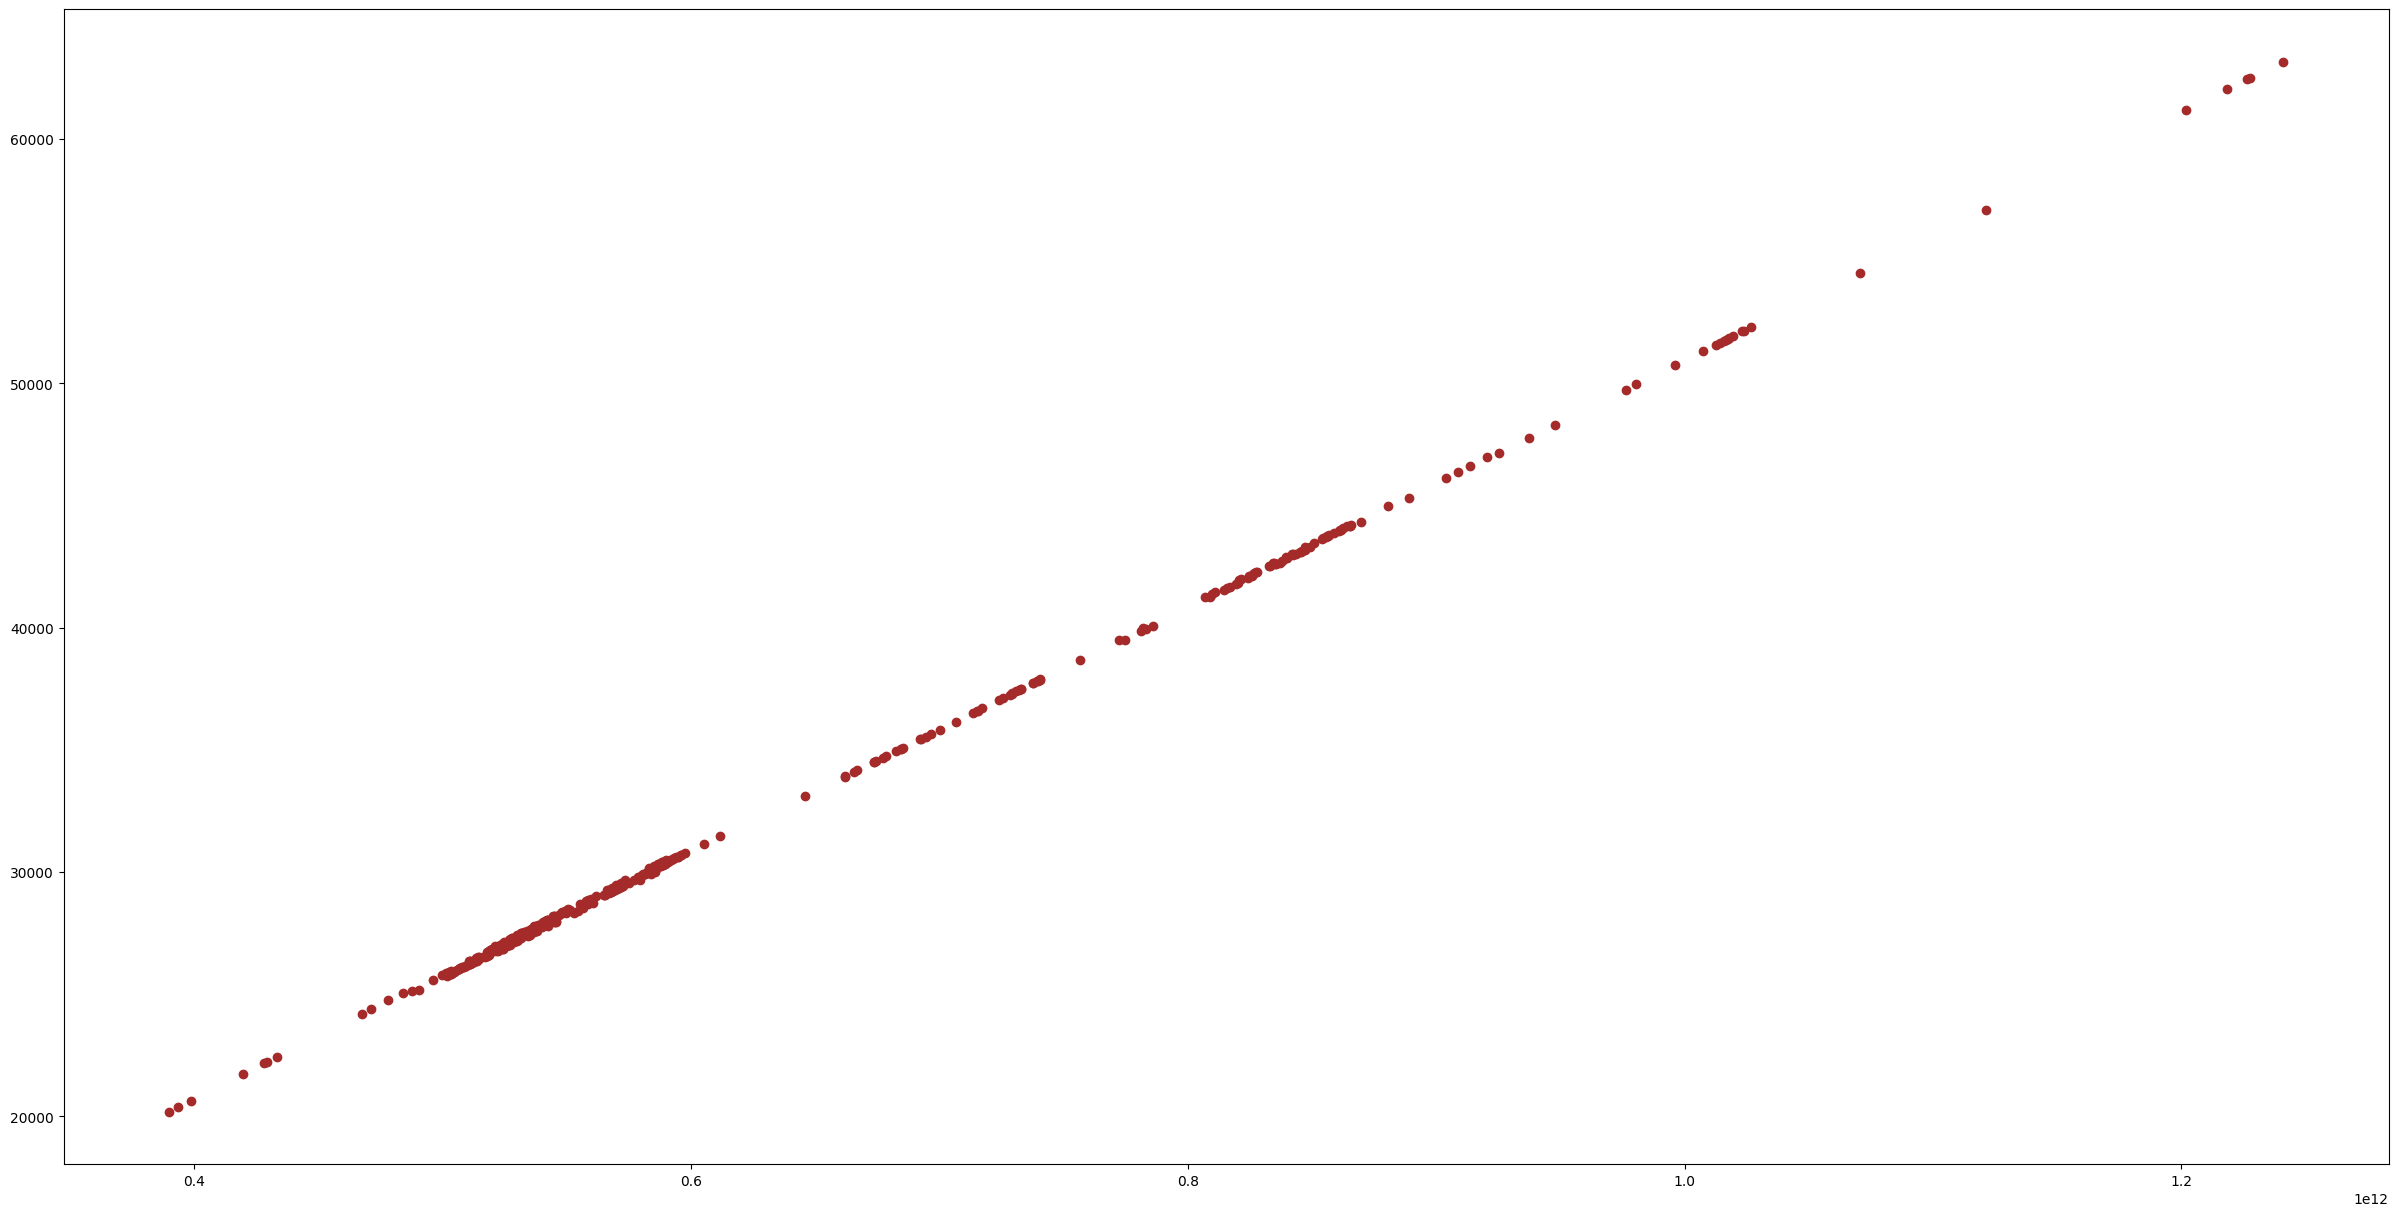

In [82]:
plt.figure(figsize=(30,15))
plt.scatter(cdf['Market Cap'], cdf.Close ,color = "Brown")

# Split Data For Train And Test

In [97]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Train Data with Open 

In [98]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Open']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[1.01241503]]
intercept:  [-290.66434707]


In [99]:

y_hat= regr.predict(test[['Open']])
x = np.asanyarray(test[['Open']])
y = np.asanyarray(test[['Close']])

print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.99


C:\Users\He5am\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


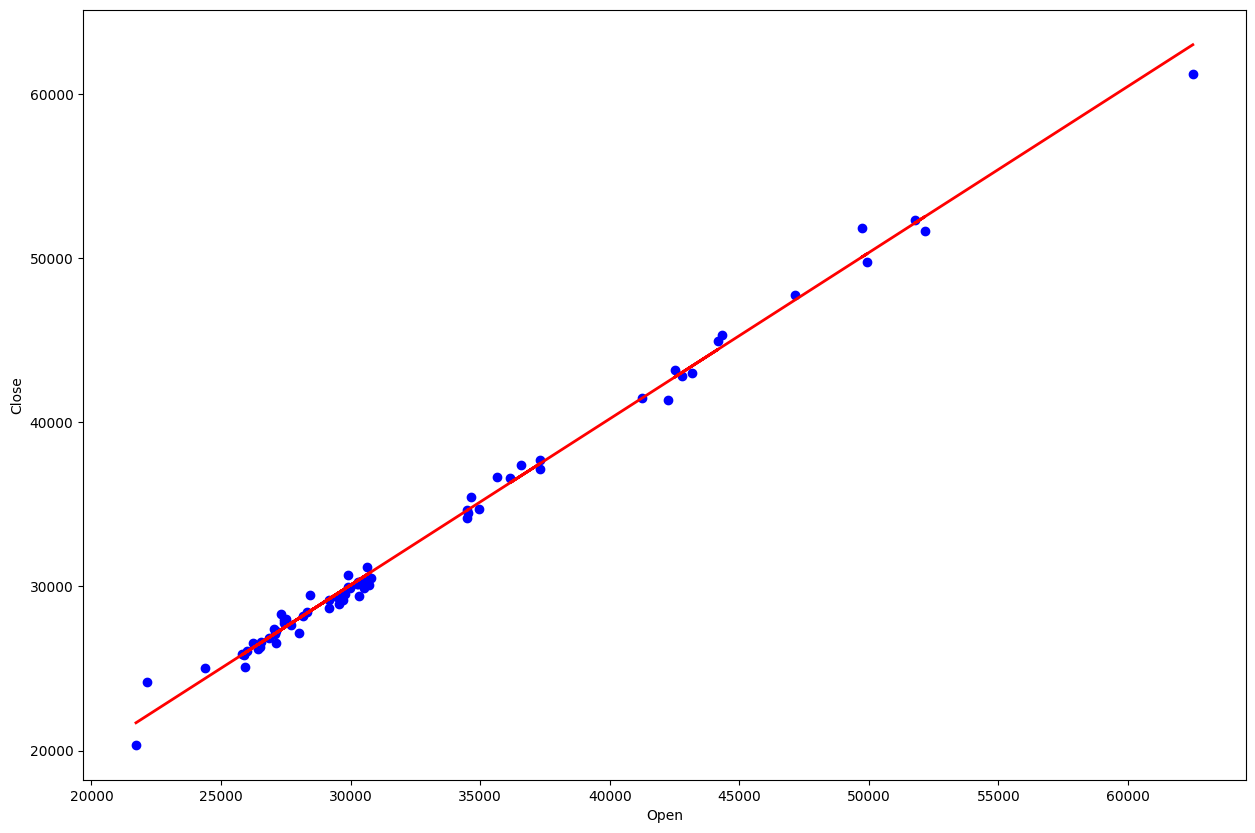

In [100]:
plt.figure(figsize=(15, 10))
plt.scatter(x,y,color='blue')

plt.plot(x, y_hat, color="red", linewidth=2)


plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

## Get Live Bitcoin Price and Predict with this model 

In [101]:
import requests

def get_bitcoin_price():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest'
    parameters = {
        'symbol': 'BTC',  
        'convert': 'USD'  
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '7017d25c-4b6b-4bb0-8643-6ffa62132e87',
    }

    try:
        response = requests.get(url, params=parameters, headers=headers)
        data = response.json()
        bitcoin_price = data['data']['BTC']['quote']['USD']['price']
        return bitcoin_price
    except Exception as e:
        print("Error fetching Bitcoin price:", e)
        return None

btc_price = get_bitcoin_price()

if btc_price:
    price = round(btc_price)
    print("Live Bitcoin price:", price)
else:
    print("Failed to fetch Bitcoin price.")


Live Bitcoin price: 66720


## Prediction with trained model 

In [102]:
predicted_value = regr.predict([[price]])
print(round(predicted_value[0][0]))

67258


## Predict 2024-05-30 price With Open 

### Price was 67576

In [103]:
predicted_value = regr.predict([[67576]])

### The actual price of Bitcoin on May 30 is $68,364 

In [104]:
print(round(predicted_value[0][0]))

68124


# Try to Train anohter Model

## Predict with marketcap


In [105]:
msk2 = np.random.rand(len(cdf)) < 0.8
train2 = cdf[msk2]
test2 = cdf[~msk2]

In [106]:
regr2 = linear_model.LinearRegression()

x = np.asanyarray(train2[['Market Cap']])
y = np.asanyarray(train2[['Close']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
print ('intercept: ', regr.intercept_)

Coefficients:  [[5.03228852e-08]]
intercept:  [629.53775915]


In [107]:
y_hat= regr.predict(test2[['Market Cap']])
x = np.asanyarray(test2[['Market Cap']])
y = np.asanyarray(test2[['Close']])

print('Variance score: %.2f' % regr.score(x, y))

Variance score: 1.00


C:\Users\He5am\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


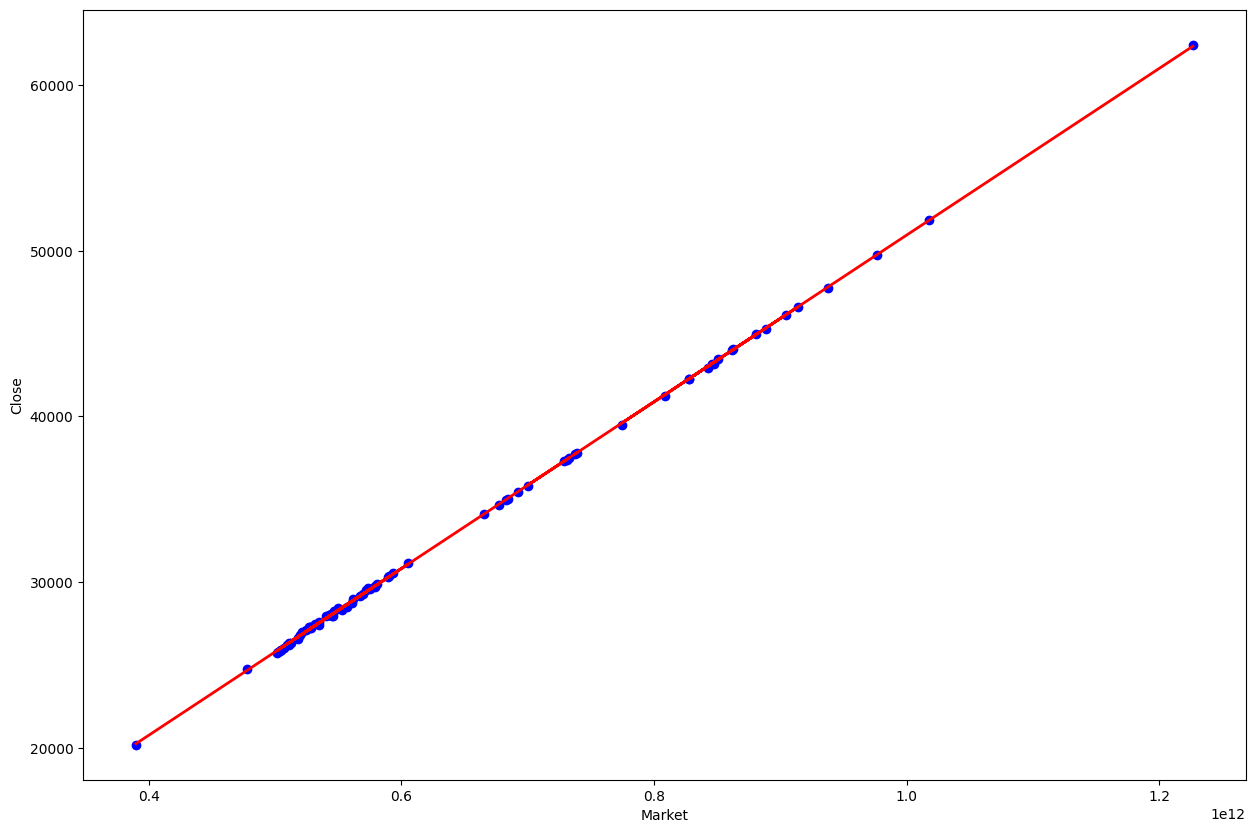

In [108]:
plt.figure(figsize=(15, 10))
plt.scatter(x,y,color='blue')

plt.plot(x, y_hat, color="red", linewidth=2)


plt.xlabel("Market")
plt.ylabel("Close")
plt.show()

## Predict 2024-05-30 price With MarketCap 

## MarketCap was $1,347,131,845,679


In [109]:
predicted_value = regr.predict([[1347131845679]])


### The actual price of Bitcoin on May 30 is $68,364 

In [110]:
print(round(predicted_value2[0][0]))

68420
